In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_coal_mining = pd.read_csv("../csv/asset_coal-mining_emissions.csv")

In [3]:
df_coal_mining.head()

,asset_id,iso3_country,original_inventory_sector,start_time,end_time,temporal_granularity,lat_lon,gas,emissions_quantity,emissions_factor,...,capacity,capacity_units,capacity_factor,activity,activity_units,created_date,modified_date,asset_name,asset_type,st_astext
0,136113483,CHN,coal-mining,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,NaN,co2,0.00,0.0,...,1.5,coal_mine_depth,0.752,1.128,tonnes_coal_extracted,2022-10-10 23:24:31.542483,NaN,Tashan Coal Mine Baidong Well,Bituminous,POINT(113.047421 39.993508)
1,136113483,CHN,coal-mining,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,NaN,ch4,20557.00,18224.0,...,1.5,coal_mine_depth,0.752,1.128,tonnes_coal_extracted,2022-10-10 23:24:31.544554,NaN,Tashan Coal Mine Baidong Well,Bituminous,POINT(113.047421 39.993508)
2,136113483,CHN,coal-mining,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,NaN,n2o,0.00,0.0,...,1.5,coal_mine_depth,0.752,1.128,tonnes_coal_extracted,2022-10-10 23:24:31.544577,NaN,Tashan Coal Mine Baidong Well,Bituminous,POINT(113.047421 39.993508)
3,136113483,CHN,coal-mining,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,NaN,co2e_100yr,612588.83,0.0,...,1.5,coal_mine_depth,0.752,1.128,tonnes_coal_extracted,2022-10-10 23:24:31.544608,NaN,Tashan Coal Mine Baidong Well,Bituminous,POINT(113.047421 39.993508)
4,136113483,CHN,coal-mining,2021-01-01 00:00:00,2021-12-31 00:00:00,annual,NaN,co2e_20yr,1695925.44,0.0,...,1.5,coal_mine_depth,0.752,1.128,tonnes_coal_extracted,2022-10-10 23:24:31.544666,NaN,Tashan Coal Mine Baidong Well,Bituminous,POINT(113.047421 39.993508)


In [4]:
df_coal_mining.columns

Index(['asset_id', 'iso3_country', 'original_inventory_sector', 'start_time',
       'end_time', 'temporal_granularity', 'lat_lon', 'gas',
       'emissions_quantity', 'emissions_factor', 'emissions_factor_units',
       'capacity', 'capacity_units', 'capacity_factor', 'activity',
       'activity_units', 'created_date', 'modified_date', 'asset_name',
       'asset_type', 'st_astext'],
      dtype='object')

In [5]:
df_oil_gas = pd.read_csv("../csv/asset_oil-and-gas-production-and-transport_emissions.csv")

In [6]:
df_solid_fuel_trans = pd.read_csv("../csv/country_solid-fuel-transformation_emissions.csv")

In [7]:
df_solid_fuel_trans_ems_co = df_solid_fuel_trans[["iso3_country", "emissions_quantity"]].groupby("iso3_country").sum().sort_values("emissions_quantity", ascending = False)

In [8]:
df_solid_fuel_trans_ems_co.head()

,emissions_quantity
iso3_country,
CHN,1.235948e+10
IDN,3.683986e+09
RUS,2.309826e+09
ZAF,4.580818e+08
VNM,4.235999e+08


In [9]:
len(df_solid_fuel_trans_ems_co.index)

251

In [10]:
df_solid_fuel_trans_ems_co = df_solid_fuel_trans_ems_co.iloc[0:67]

In [11]:
df_oil_gas_ems_co = df_oil_gas[["iso3_country", "emissions_quantity"]].groupby("iso3_country").sum().sort_values("emissions_quantity", ascending = False)

In [12]:
df_oil_gas_ems_co.head()

,emissions_quantity
iso3_country,
USA,1.778026e+10
RUS,1.706589e+10
CAN,4.203251e+09
IRN,3.985785e+09
CHN,3.621585e+09


In [13]:
len(df_oil_gas_ems_co.index)

91

In [14]:
df_oil_gas_ems_co = df_oil_gas_ems_co.iloc[0:67]

In [15]:
df_coal_mining_ems_co = df_coal_mining[["iso3_country", "emissions_quantity"]].groupby("iso3_country").sum().sort_values("emissions_quantity", ascending = False)

In [16]:
len(df_coal_mining_ems_co.index)

68

Text(0.5, 0, 'tonnes of gas emission / Solid Fuel Transformation')

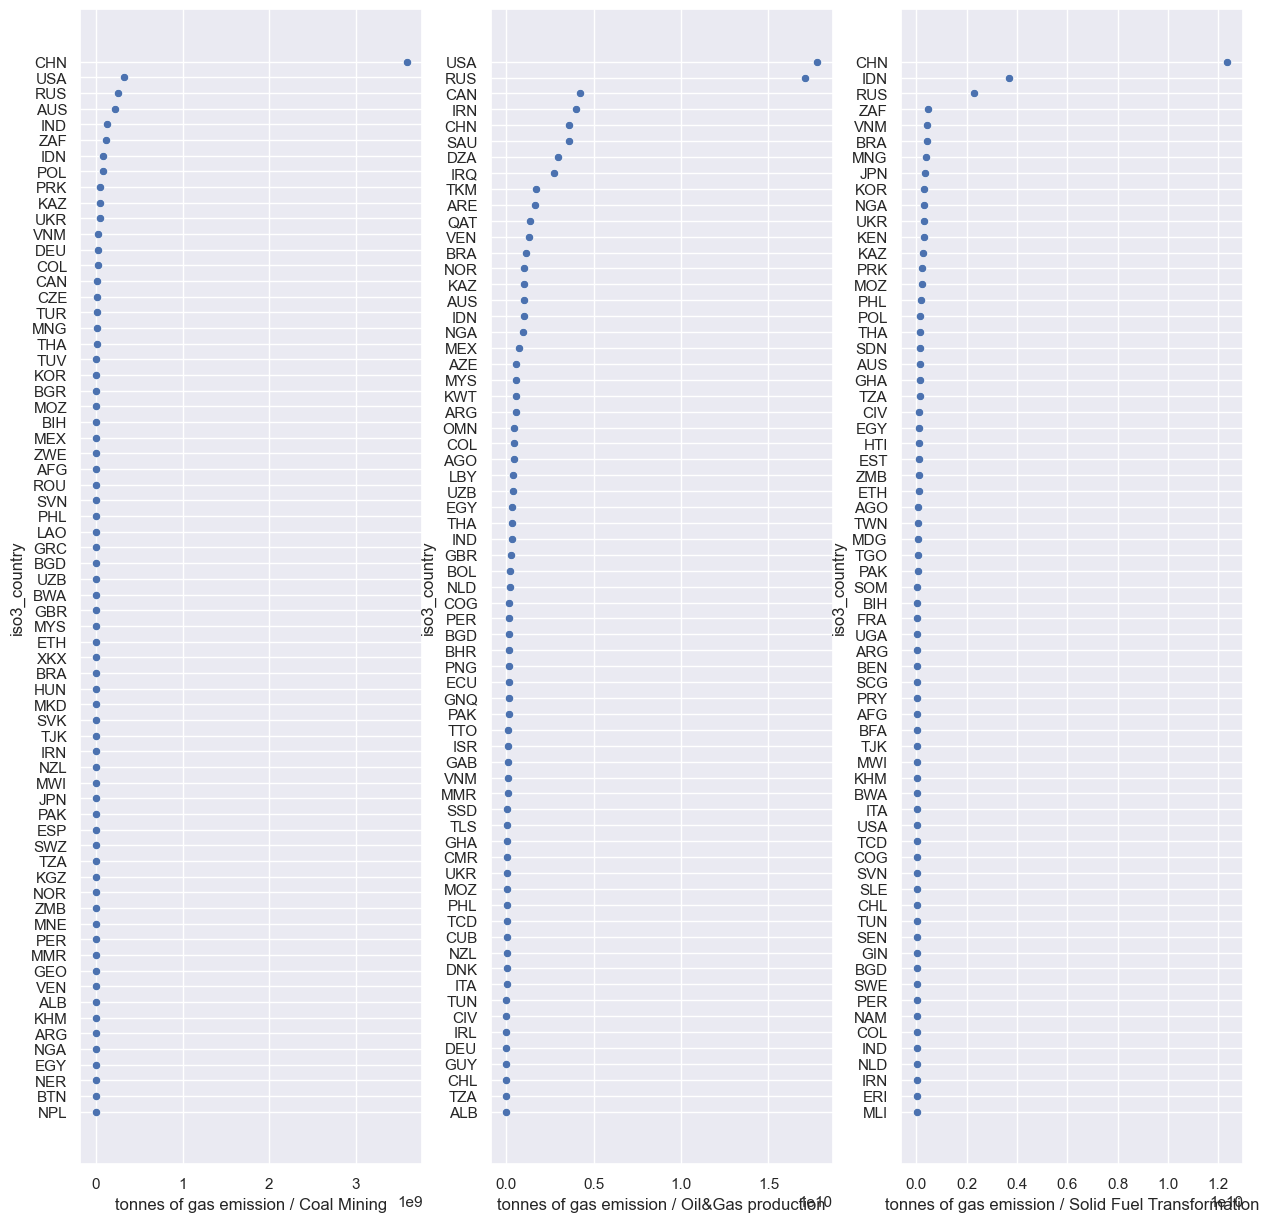

In [18]:
fig, (ax1,ax2, ax3) = plt.subplots(ncols=3, figsize = (15,15))

sns.set_theme()

sns.scatterplot(data = df_coal_mining_ems_co, ax = ax1, x = "emissions_quantity", y = "iso3_country")
sns.scatterplot(data = df_oil_gas_ems_co, ax = ax2, x = "emissions_quantity", y = "iso3_country")
sns.scatterplot(data = df_solid_fuel_trans_ems_co, ax = ax3, x = "emissions_quantity", y = "iso3_country")

ax1.set_xlabel("tonnes of gas emission / Coal Mining")
ax2.set_xlabel("tonnes of gas emission / Oil&Gas production")
ax3.set_xlabel("tonnes of gas emission / Solid Fuel Transformation")